In [8]:
import pandas as pd

# Read the Excel file
df = pd.read_excel(r"C:\Users\avtha\Desktop\University\Semester 4\Master thesis\Data\finalized_data.xlsx")

#Add index column
df['id'] = range(1, len(df) + 1)

#Classify cleaned_feedback by ship_id
ship_ids = df['ship_id'].unique()

for ship_id in ship_ids:
    ship_df = df[df['ship_id'] == ship_id]
    output_file = f"ship_{ship_id}_feedback.xlsx"
    ship_df.to_excel(output_file, index=False)

    print(f"Feedbacks for Ship ID {ship_id} saved to {output_file}")

Feedbacks for Ship ID 0 saved to ship_0_feedback.xlsx
Feedbacks for Ship ID 1 saved to ship_1_feedback.xlsx
Feedbacks for Ship ID 2 saved to ship_2_feedback.xlsx
Feedbacks for Ship ID 3 saved to ship_3_feedback.xlsx
Feedbacks for Ship ID 4 saved to ship_4_feedback.xlsx
Feedbacks for Ship ID 5 saved to ship_5_feedback.xlsx
Feedbacks for Ship ID 6 saved to ship_6_feedback.xlsx
Feedbacks for Ship ID 8 saved to ship_8_feedback.xlsx
Feedbacks for Ship ID 9 saved to ship_9_feedback.xlsx
Feedbacks for Ship ID 10 saved to ship_10_feedback.xlsx
Feedbacks for Ship ID 11 saved to ship_11_feedback.xlsx
Feedbacks for Ship ID 12 saved to ship_12_feedback.xlsx
Feedbacks for Ship ID 13 saved to ship_13_feedback.xlsx
Feedbacks for Ship ID 14 saved to ship_14_feedback.xlsx
Feedbacks for Ship ID 15 saved to ship_15_feedback.xlsx
Feedbacks for Ship ID 16 saved to ship_16_feedback.xlsx
Feedbacks for Ship ID 17 saved to ship_17_feedback.xlsx
Feedbacks for Ship ID 18 saved to ship_18_feedback.xlsx
Feedbacks 

wordcloud for ship#1

c:\Users\avtha\anaconda3\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


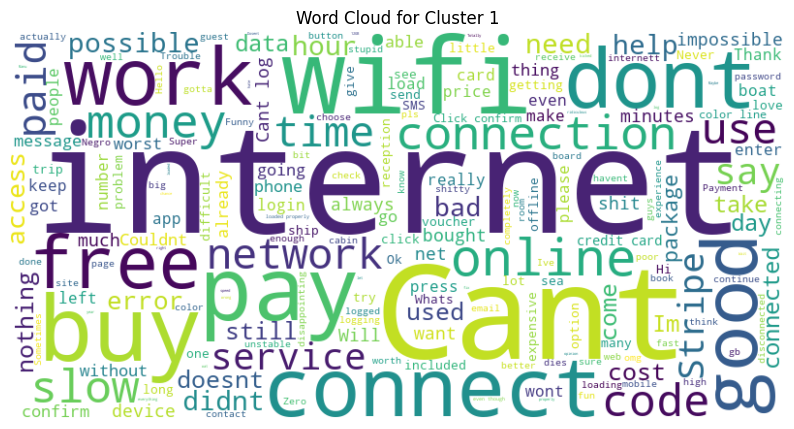

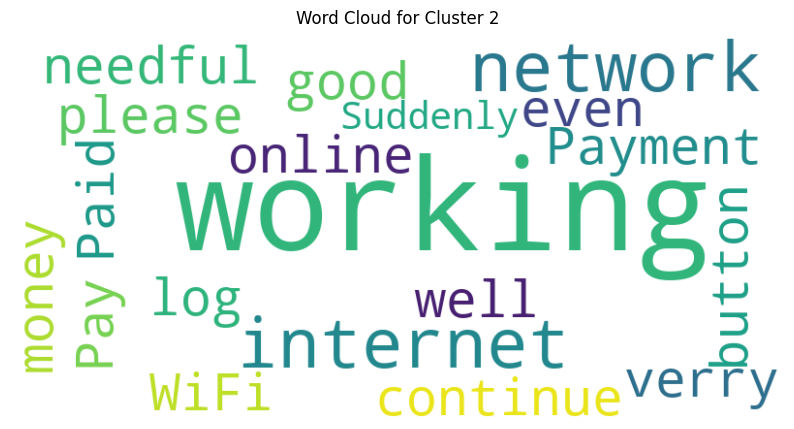

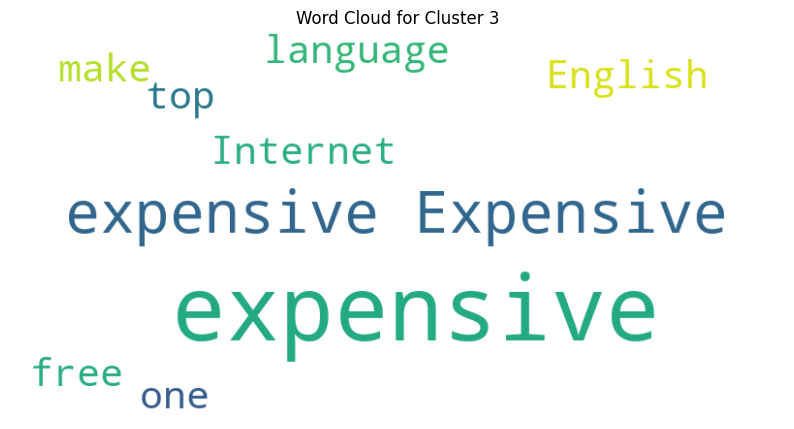

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#Read Excel file
file_path = r"C:\Users\avtha\Desktop\University\Semester 4\Master thesis\output\ship-wise classification\ship_1_feedback.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

#vectorization and clustering on cleaned_feedback
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_feedback'])

#number of clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)
clusters = kmeans.labels_.tolist()

#Add cluster labels to DataFrame
df['cluster'] = clusters

#Save DataFrame to the same Excel file with different sheets for each cluster
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    for cluster_num in range(num_clusters):
        cluster_df = df[df['cluster'] == cluster_num]
        cluster_df.to_excel(writer, sheet_name=f'cat{cluster_num+1}', index=False)

#Visualize clusters using word cloud
for cluster_num in range(num_clusters):
    cluster_df = df[df['cluster'] == cluster_num]
    feedback_text = ' '.join(cluster_df['cleaned_feedback'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_num+1}')
    plt.axis('off')
    plt.show()


Summerize the clusters for ship #1 

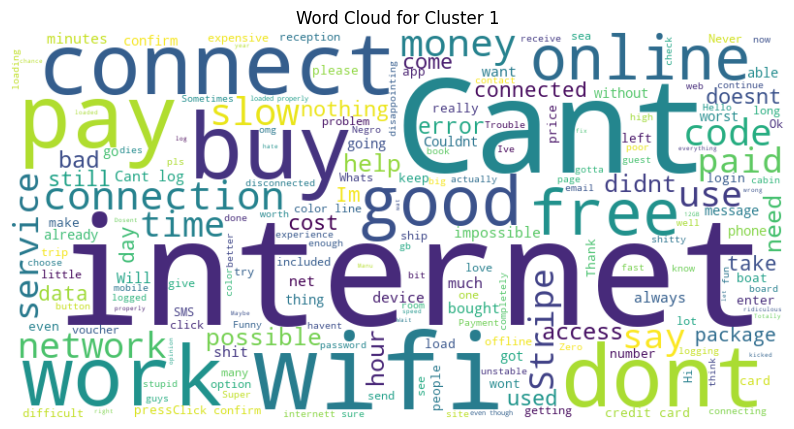


Summary of Word Cloud for Cluster 1:
to: 126
I: 118
the: 115
internet: 78
and: 71
not: 68
it: 60
is: 56
have: 55
get: 52




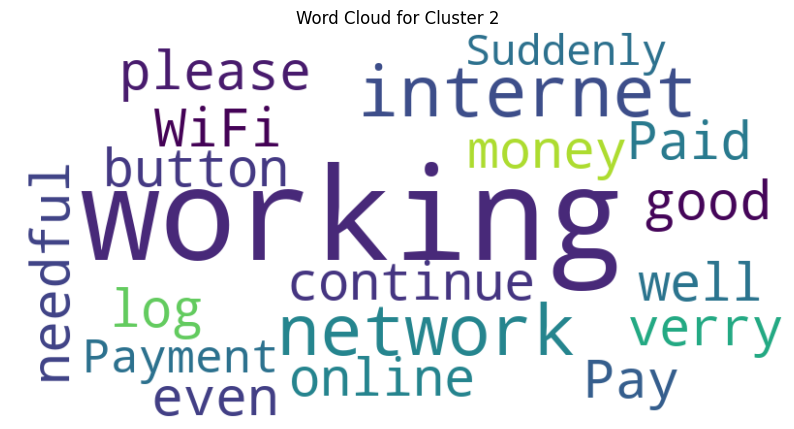


Summary of Word Cloud for Cluster 2:
working: 22
not: 16
is: 6
Not: 5
Its: 4
It: 2
for: 2
The: 2
internet: 2
at: 2




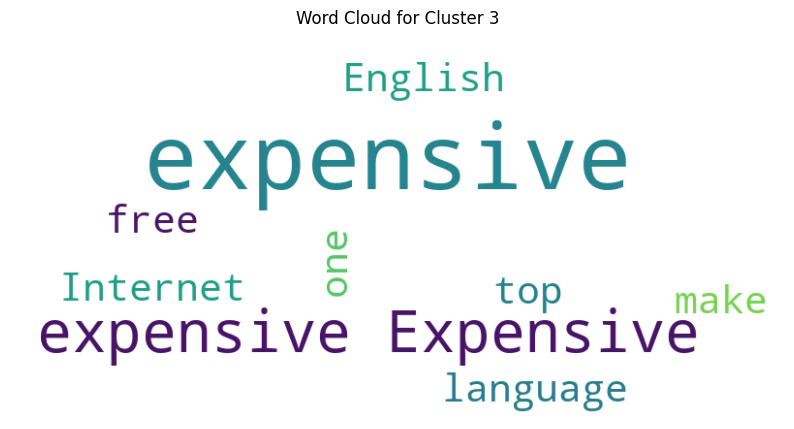


Summary of Word Cloud for Cluster 3:
expensive: 12
Expensive: 4
Very: 3
Too: 3
is: 3
Its: 2
too: 2
and: 1
the: 1
language: 1




In [3]:
from collections import Counter

# Visualize clusters using word clouds and summarize
for cluster_num in range(num_clusters):
    cluster_df = df[df['cluster'] == cluster_num]
    feedback_text = ' '.join(cluster_df['cleaned_feedback'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_num+1}')
    plt.axis('off')
    plt.show()
    
    # Summarize the word cloud
    word_freq = Counter(feedback_text.split())
    print(f"\nSummary of Word Cloud for Cluster {cluster_num+1}:")
    for word, freq in word_freq.most_common(10):  # You can adjust the number of top words to display
        print(f"{word}: {freq}")
    print("\n")


we can change number of clusters and file_path here and get wordcloud for each ship

c:\Users\avtha\anaconda3\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


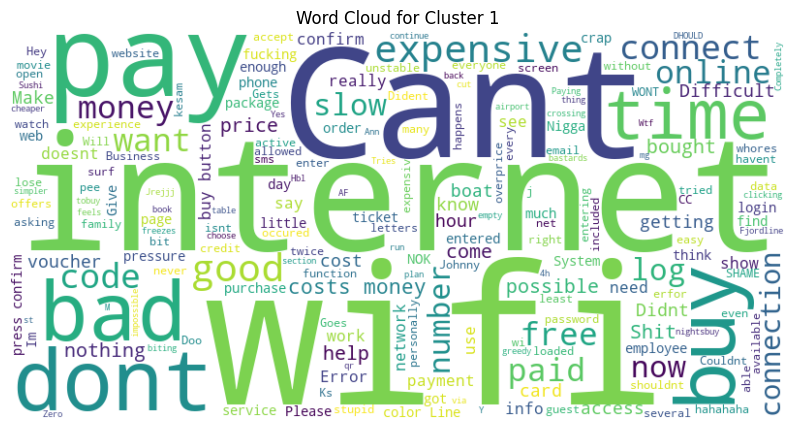

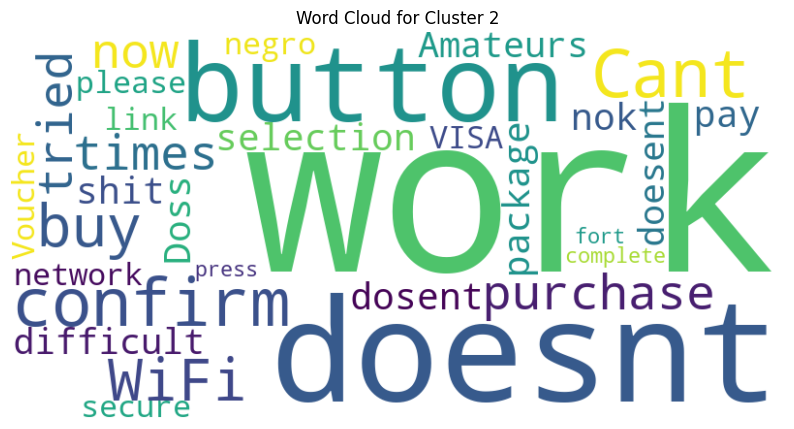

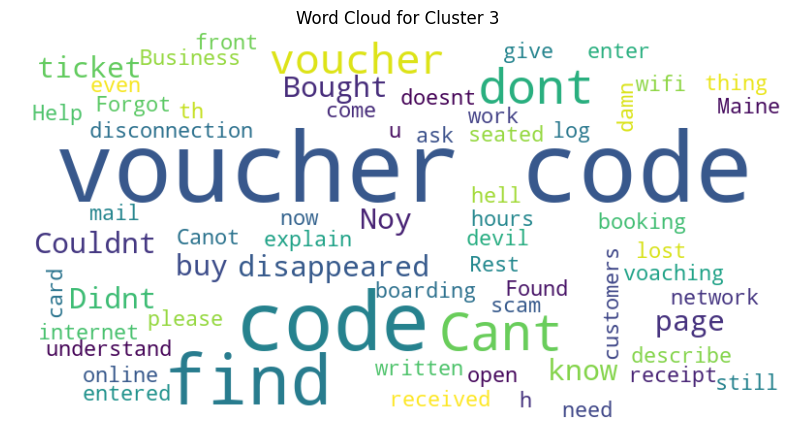

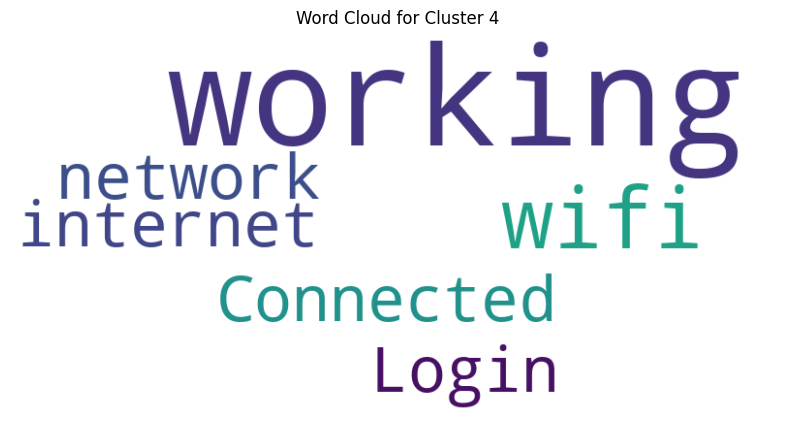

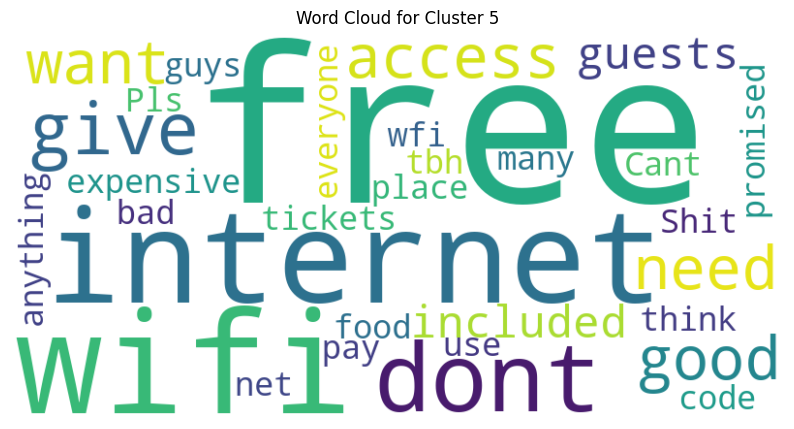

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def cluster_and_visualize(file_path, num_clusters=5):
    # Read Excel file
    df = pd.read_excel(file_path, engine='openpyxl')

    # Vectorization and clustering on cleaned_feedback
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['cleaned_feedback'])

    # KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_matrix)
    clusters = kmeans.labels_.tolist()

    # Add cluster labels to DataFrame
    df['cluster'] = clusters

    # Save DataFrame to the same Excel file with different sheets for each cluster
    with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
        for cluster_num in range(num_clusters):
            cluster_df = df[df['cluster'] == cluster_num]
            cluster_df.to_excel(writer, sheet_name=f'cat{cluster_num+1}', index=False)

    # Visualize clusters using word cloud
    for cluster_num in range(num_clusters):
        cluster_df = df[df['cluster'] == cluster_num]
        feedback_text = ' '.join(cluster_df['cleaned_feedback'])

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Cluster {cluster_num+1}')
        plt.axis('off')
        plt.show()

# Example usage
file_path = r"C:\Users\avtha\Desktop\University\Semester 4\Master thesis\output\ship-wise classification\ship_3_feedback.xlsx"
cluster_and_visualize(file_path)


Summerize the clusters for ship #3 with 5 clusters 

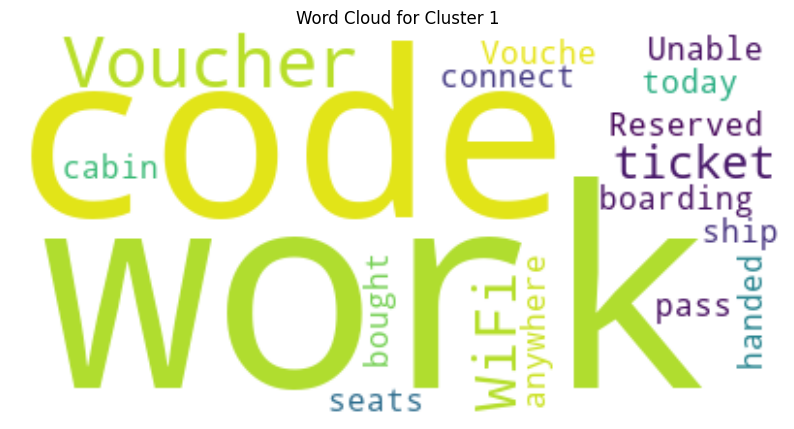


Summary of Word Cloud for Cluster 1:
does: 15
not: 15
work: 15
code: 9
on: 5
WiFi: 5
Voucher: 4
voucher: 4
Code: 3
my: 3




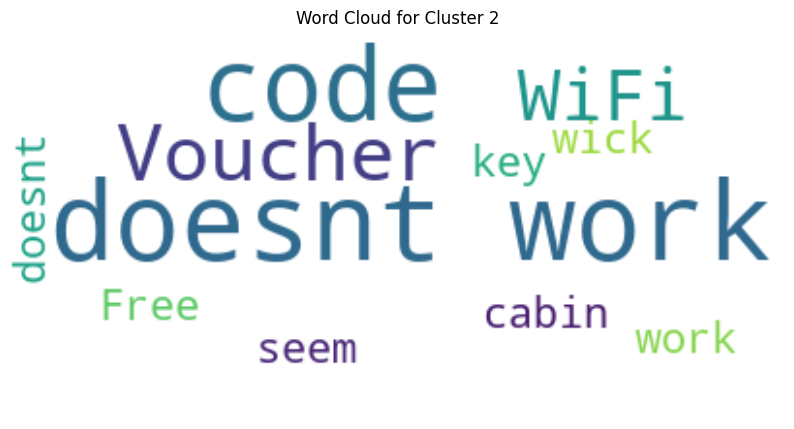


Summary of Word Cloud for Cluster 2:
work: 14
doesnt: 13
code: 9
Voucher: 4
WiFi: 3
Code: 2
voucher: 2
on: 2
seem: 1
to: 1




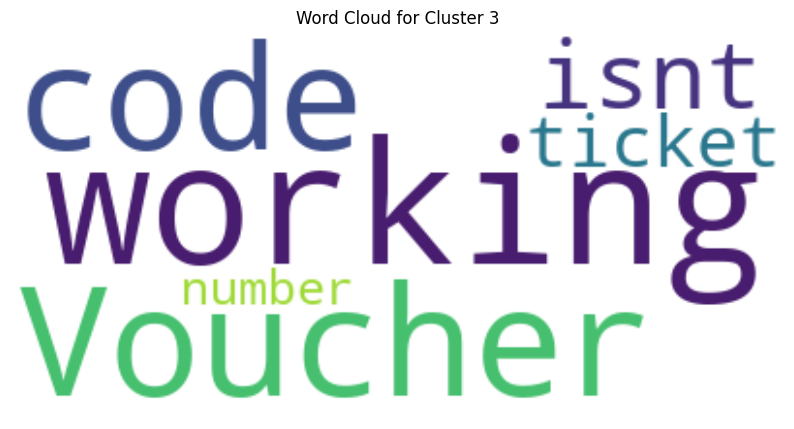


Summary of Word Cloud for Cluster 3:
working: 14
not: 11
code: 7
Voucher: 7
voucher: 4
isnt: 3
Code: 3
on: 3
ticket: 3
My: 2




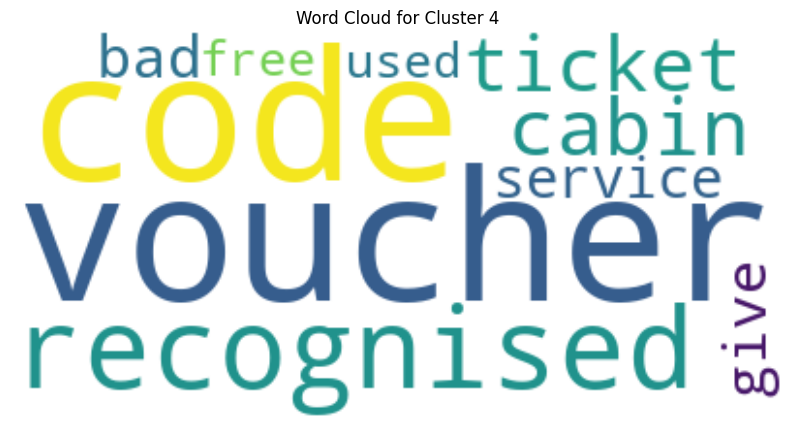


Summary of Word Cloud for Cluster 4:
code: 5
not: 5
recognised: 5
voucher: 3
on: 2
cabin: 2
ticket: 2
My: 2
was: 2
Voucher: 2




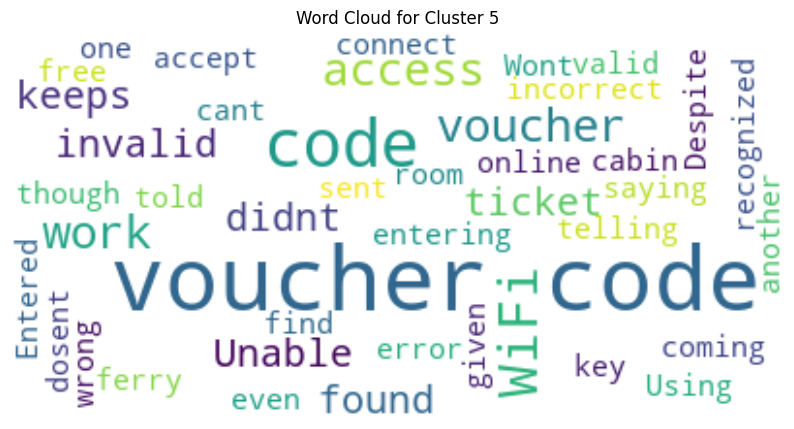


Summary of Word Cloud for Cluster 5:
code: 19
voucher: 11
Voucher: 5
not: 5
with: 4
WiFi: 4
to: 3
access: 3
my: 3
the: 3




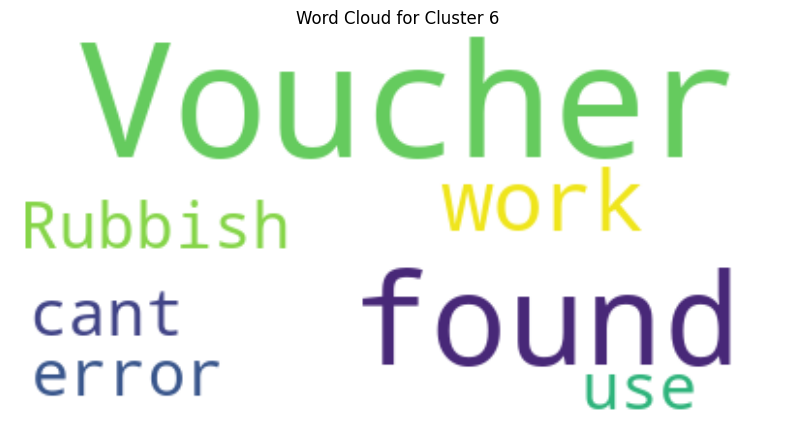


Summary of Word Cloud for Cluster 6:
Voucher: 9
not: 8
found: 6
work: 2
would: 1
Rubbish: 1
I: 1
have: 1
a: 1
voucher: 1




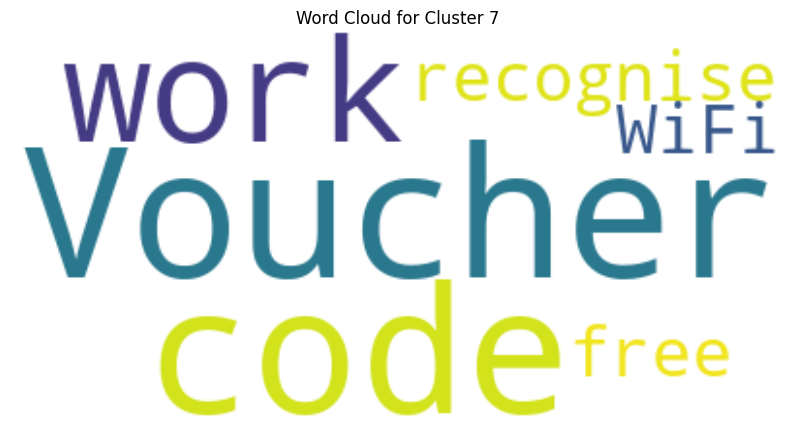


Summary of Word Cloud for Cluster 7:
not: 3
code: 3
Voucher: 2
did: 2
work: 2
Did: 1
recognise: 1
voucher: 1
1215314688: 1
for: 1




In [7]:
from collections import Counter

# Visualize clusters using word clouds and summarize
for cluster_num in range(num_clusters):
    cluster_df = df[df['cluster'] == cluster_num]
    feedback_text = ' '.join(cluster_df['cleaned_feedback'])
    
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(feedback_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_num+1}')
    plt.axis('off')
    plt.show()
    
    # Summarize the word cloud
    word_freq = Counter(feedback_text.split())
    print(f"\nSummary of Word Cloud for Cluster {cluster_num+1}:")
    for word, freq in word_freq.most_common(10):  # You can adjust the number of top words to display
        print(f"{word}: {freq}")
    print("\n")